 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv, 
                               index_col='Date', parse_dates=True, infer_datetime_format=True)

whale_returns_df.sort_index(ascending=True,inplace=True)

whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, 
                               index_col='Date', parse_dates=True, infer_datetime_format=True)

algo_returns_df.sort_index(ascending=True,inplace=True)

algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")

sp500_history_df = pd.read_csv(sp500_history_csv, 
                               index_col='Date', parse_dates=True, infer_datetime_format=True)

sp500_history_df.sort_index(ascending=True,inplace=True)

sp500_history_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_history_df.dtypes

type(sp500_history_df)

pandas.core.frame.DataFrame

In [10]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$','')

sp500_float = sp500_history_df['Close'].astype('float')

print(sp500_float.dtypes)

sp500_float_frame = sp500_float.to_frame()

sp500_float_frame.head()

float64


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [11]:
# Calculate Daily Returns
sp500_daily_returns = sp500_float_frame.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_daily_returns.dropna(inplace=True)

In [13]:
# Rename Column
sp500_daily_returns.columns = ['S&P 500']

sp500_daily_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [113]:
# Concatenate all DataFrames into a single DataFrame
all_returns_df = pd.concat([whale_returns_df,algo_returns_df,sp500_daily_returns], axis='columns', join='inner')

all_returns_df.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

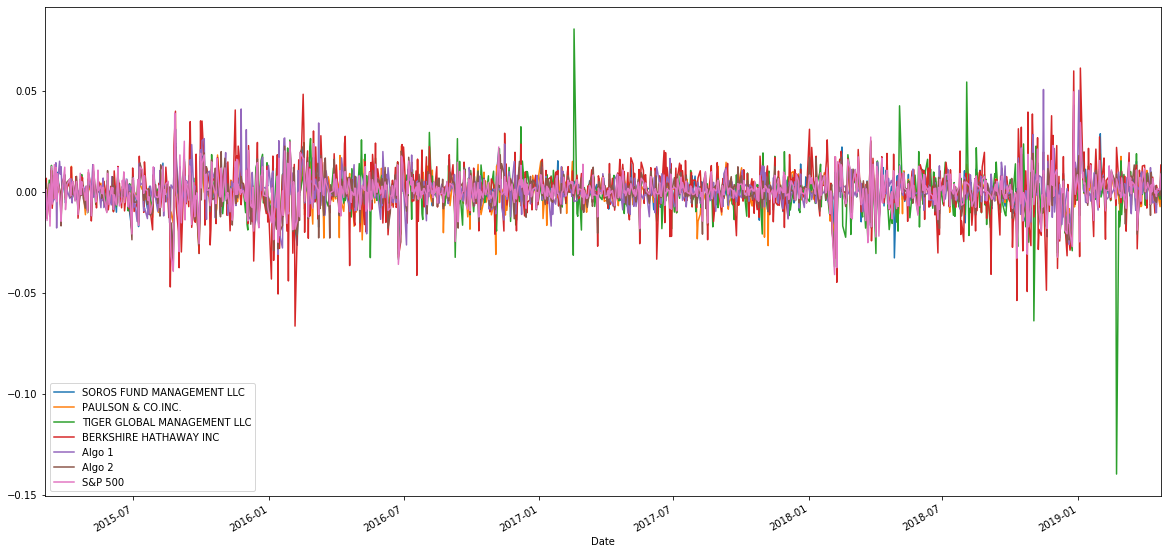

In [15]:
# Plot daily returns
all_returns_df.plot(figsize=(20,10))

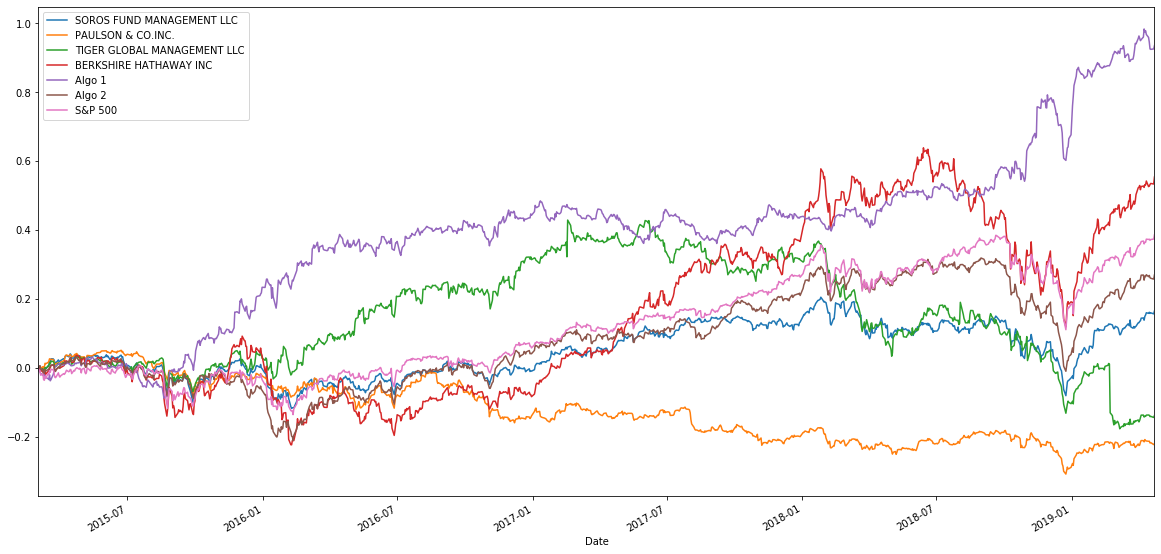

In [16]:
# Plot cumulative returns
((all_returns_df + 1).cumprod() - 1).plot(figsize=(20,10))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

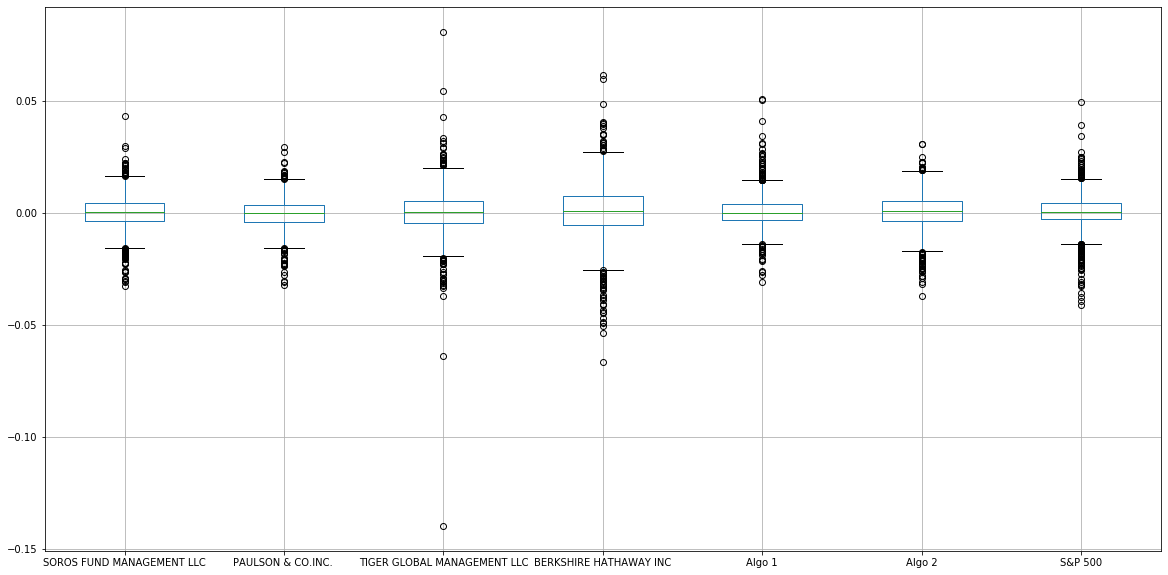

In [17]:
# Box plot to visually show risk
all_returns_df.boxplot(figsize=(20,10))

In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
std_df = all_returns_df.std().to_frame()

std_df.columns = ['Std. Dev.']

std_df

,Std. Dev.
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
S&P 500,0.008554


In [19]:
# Determine which portfolios are riskier than the S&P 500
for index in std_df.index:
    if std_df['Std. Dev.'][index] > std_df.iloc[6,0]:
        print(f'{index} is riskier.')
    elif std_df['Std. Dev.'][index] < std_df.iloc[6,0]:
        print(f'{index} is safer.')
    else:
        print('')

SOROS FUND MANAGEMENT LLC is safer.
PAULSON & CO.INC.  is safer.
TIGER GLOBAL MANAGEMENT LLC is riskier.
BERKSHIRE HATHAWAY INC is riskier.
Algo 1 is safer.
Algo 2 is safer.



In [20]:
# Calculate the annualized standard deviation (252 trading days)
volatility = all_returns_df.std() * np.sqrt(252)
print(volatility)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

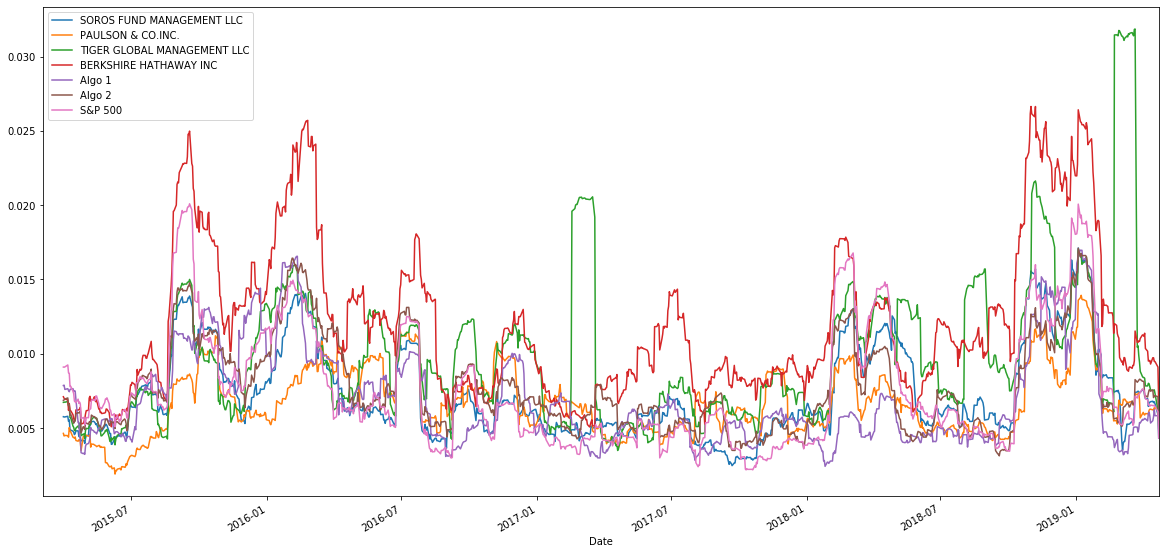

In [21]:
# Calculate and plot the rolling standard deviation for the S&P 500 using a 21 day window
all_returns_df.rolling(window=21).std().plot(figsize=(20,10))

In [22]:
# Correlation
all_returns_df.corr(method='pearson')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [23]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
covariance = all_returns_df['Algo 1'].cov(all_returns_df['S&P 500'])
covariance

variance = all_returns_df['S&P 500'].var()
variance

algo_1_beta = covariance / variance
algo_1_beta

0.24899091459425748

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [24]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [143]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_returns_df.mean() * 252) / (all_returns_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

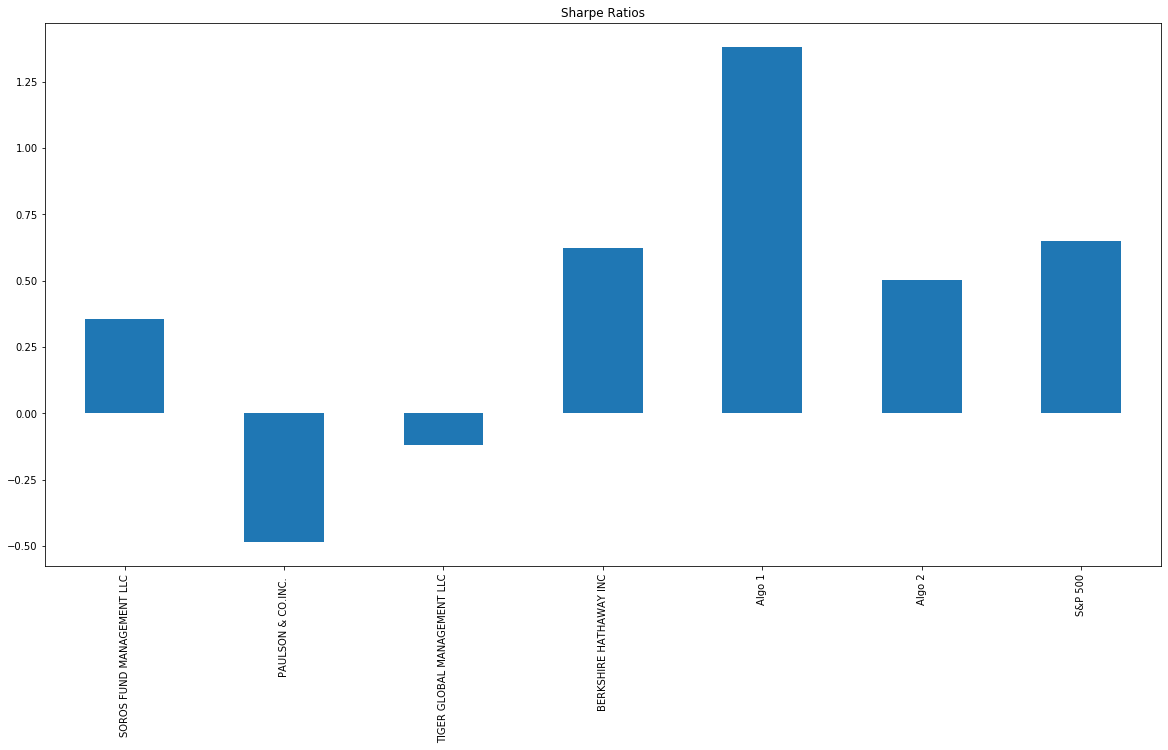

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios",figsize=(20,10))

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [115]:
# Read the first stock
aapl_prices_csv = Path("Resources/aapl_prices.csv")
aapl_prices_df = pd.read_csv(aapl_prices_csv, 
                               index_col='Date', parse_dates=True, infer_datetime_format=True)

aapl_prices_df.describe

<bound method NDFrame.describe of              Close
Date              
2015-03-03  129.36
2015-04-03  128.54
2015-05-03  126.41
2015-06-03  126.60
2015-09-03  127.14
...            ...
2019-04-15  199.23
2019-04-16  199.25
2019-04-17  203.13
2019-04-18  203.86
2019-04-22  204.53

[1042 rows x 1 columns]>

In [116]:
# Read the second stock
fb_prices_csv = Path("Resources/fb_prices.csv")
fb_prices_df = pd.read_csv(fb_prices_csv, 
                               index_col='Date', parse_dates=True, infer_datetime_format=True)

fb_prices_df.describe

<bound method NDFrame.describe of              Close
Date              
2015-03-03   79.60
2015-04-03   80.90
2015-05-03   81.21
2015-06-03   80.01
2015-09-03   79.44
...            ...
2019-04-15  179.65
2019-04-16  178.87
2019-04-17  178.78
2019-04-18  178.28
2019-04-22  181.44

[1042 rows x 1 columns]>

In [117]:
# Read the third stock
dis_prices_csv = Path("Resources/dis_prices.csv")
dis_prices_df = pd.read_csv(dis_prices_csv, 
                               index_col='Date', parse_dates=True, infer_datetime_format=True)

dis_prices_df.describe

<bound method NDFrame.describe of              Close
Date              
2015-03-03  106.35
2015-04-03  105.57
2015-05-03  105.03
2015-06-03  103.82
2015-09-03  105.26
...            ...
2019-04-15  132.04
2019-04-16  129.90
2019-04-17  131.75
2019-04-18  132.45
2019-04-22  131.68

[1042 rows x 1 columns]>

In [118]:
# Concatenate all stocks into a single DataFrame
my_port = pd.concat([aapl_prices_df,fb_prices_df,dis_prices_df], axis='columns', join='inner')

my_port.columns = ['AAPL','FB','DIS']

my_port.head()

,AAPL,FB,DIS
Date,,,
2015-03-03,129.36,79.60,106.35
2015-04-03,128.54,80.90,105.57
2015-05-03,126.41,81.21,105.03
2015-06-03,126.60,80.01,103.82
2015-09-03,127.14,79.44,105.26


In [119]:
# Reset the index
my_port.reset_index()

,Date,AAPL,FB,DIS
0,2015-03-03,129.36,79.60,106.35
1,2015-04-03,128.54,80.90,105.57
2,2015-05-03,126.41,81.21,105.03
3,2015-06-03,126.60,80.01,103.82
4,2015-09-03,127.14,79.44,105.26
...,...,...,...,...
1037,2019-04-15,199.23,179.65,132.04
1038,2019-04-16,199.25,178.87,129.90
1039,2019-04-17,203.13,178.78,131.75
1040,2019-04-18,203.86,178.28,132.45


In [123]:
# Drop Nulls
my_port.dropna(inplace=True)
my_port.isnull().sum()

AAPL    0
FB      0
DIS     0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [125]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]

daily_returns = my_port.pct_change()
daily_returns.head()

portfolio_returns = daily_returns.dot(weights).to_frame()

portfolio_returns.dropna(inplace=True)

portfolio_returns.columns = ['Portfolio Returns']

portfolio_returns

,Portfolio Returns
Date,
2015-04-03,0.000886
2015-05-03,-0.005951
2015-06-03,-0.008265
2015-09-03,0.003670
2015-10-03,-0.021698
...,...
2019-04-15,0.006702
2019-04-16,-0.006816
2019-04-17,0.011071


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [126]:
all_port_returns = pd.concat([portfolio_returns,all_returns_df], axis='columns', join='inner')

In [127]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_port_returns.dropna(inplace=True)

all_port_returns.rename(columns={'Portfolio Returns':'3-Stock Portfolio'},inplace=True)

all_port_returns

,3-Stock Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,,
2015-06-03,-0.008265,0.003248,-0.000080,0.001013,0.001017,-0.005906,0.007484,0.002119
2015-09-03,0.003670,0.002879,-0.001426,0.005152,-0.009052,0.001383,-0.001680,0.001165
2015-11-03,-0.006638,0.005853,0.002269,0.007130,0.014331,0.019469,0.000629,0.002728
2015-12-03,0.025737,-0.012023,-0.007407,-0.018869,-0.015716,0.007114,-0.013703,-0.014374
2015-03-13,-0.008290,-0.002497,-0.001428,-0.003697,-0.008142,-0.005423,-0.005062,-0.006075
...,...,...,...,...,...,...,...,...
2019-04-15,0.006702,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000629
2019-04-16,-0.006816,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.011071,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

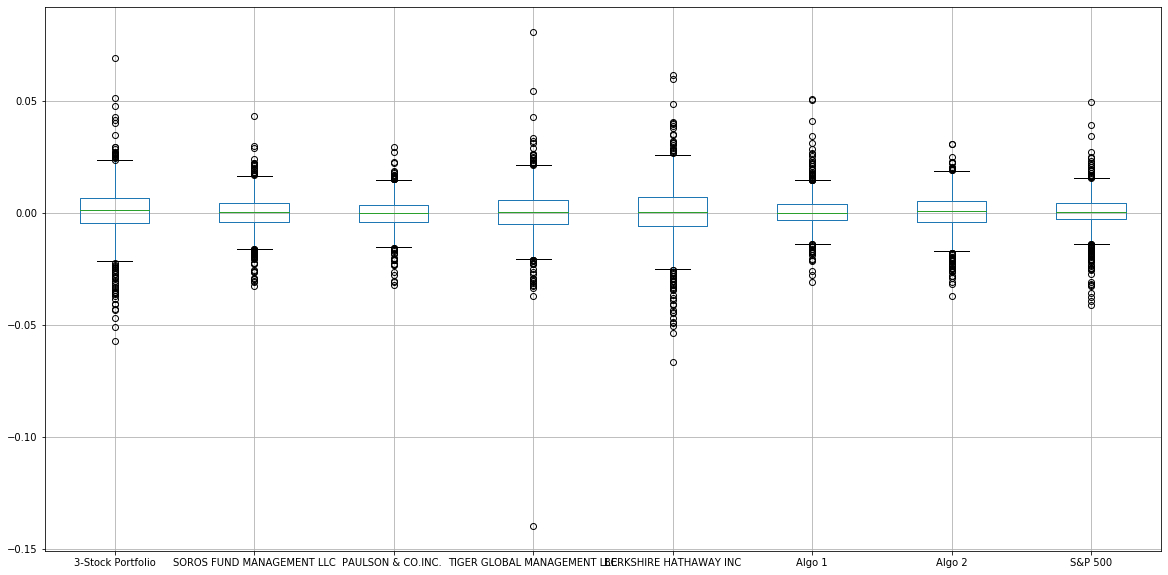

In [139]:
# Risk
all_port_returns.boxplot(figsize=(20,10))

In [129]:
all_std_df = all_port_returns.std().to_frame()

all_std_df.columns = ['Std. Dev.']

all_std_df

,Std. Dev.
3-Stock Portfolio,0.011909
SOROS FUND MANAGEMENT LLC,0.008059
PAULSON & CO.INC.,0.007039
TIGER GLOBAL MANAGEMENT LLC,0.011141
BERKSHIRE HATHAWAY INC,0.013153
Algo 1,0.007629
Algo 2,0.008421
S&P 500,0.008637


In [130]:
all_volatility = all_port_returns.std() * np.sqrt(252)

all_volatility

3-Stock Portfolio              0.189055
SOROS FUND MANAGEMENT LLC      0.127937
PAULSON & CO.INC.              0.111748
TIGER GLOBAL MANAGEMENT LLC    0.176863
BERKSHIRE HATHAWAY INC         0.208803
Algo 1                         0.121102
Algo 2                         0.133672
S&P 500                        0.137105
dtype: float64

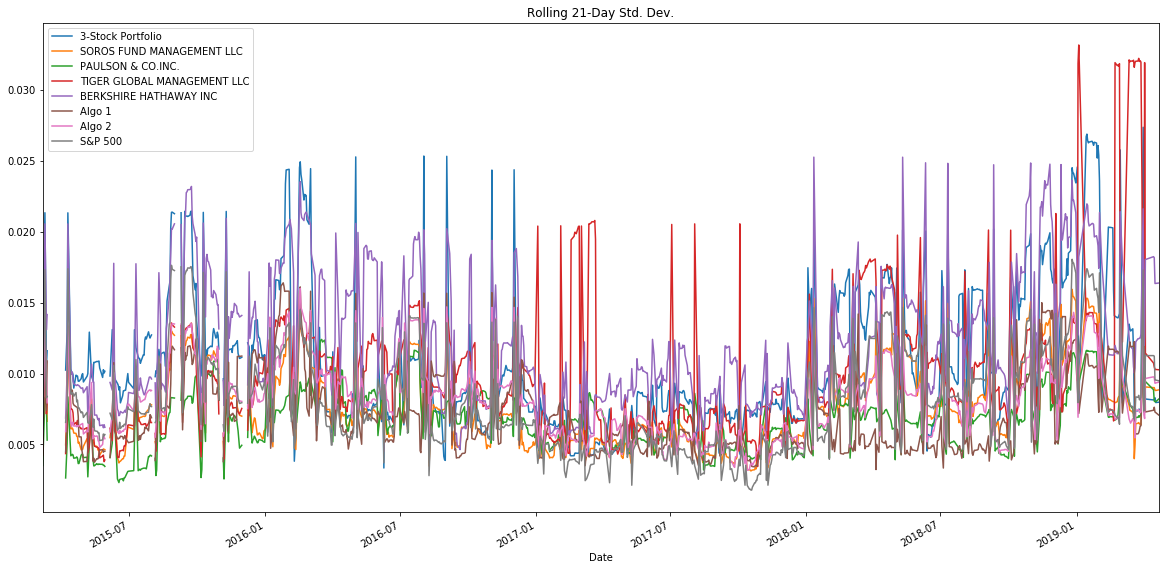

In [141]:
# Rolling
all_port_returns.rolling(window=21).std().plot(title="Rolling 21-Day Std. Dev.", figsize=(20,10))

In [133]:
# Beta
all_covariance = all_port_returns['3-Stock Portfolio'].cov(all_port_returns['S&P 500'])
all_covariance

all_variance = all_port_returns['S&P 500'].var()
all_variance

my_port_beta = all_covariance / all_variance
my_port_beta

0.760348257145949

In [134]:
# Annualized Sharpe Ratios
all_sharpe_ratios = (all_port_returns.mean() * 252) / (all_port_returns.std() * np.sqrt(252))
all_sharpe_ratios

3-Stock Portfolio              0.693085
SOROS FUND MANAGEMENT LLC     -0.027607
PAULSON & CO.INC.             -0.724263
TIGER GLOBAL MANAGEMENT LLC   -0.024126
BERKSHIRE HATHAWAY INC         0.175515
Algo 1                         1.169905
Algo 2                         0.197830
S&P 500                        0.314283
dtype: float64

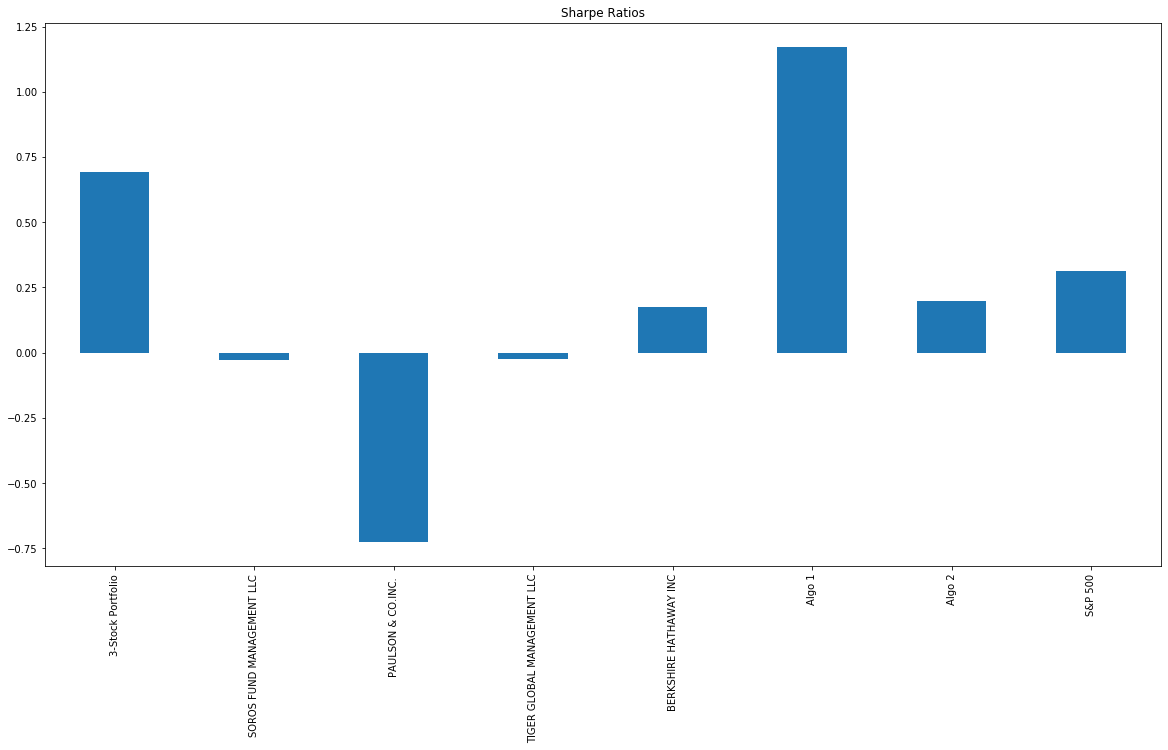

In [135]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios",figsize=(20,10))

## Include correlation analysis to determine which stocks (if any) are correlated

In [136]:
my_port.corr(method='pearson')

,AAPL,FB,DIS
AAPL,1.000000,0.778899,0.480435
FB,0.778899,1.000000,0.108233
DIS,0.480435,0.108233,1.000000
